In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix

from sklearn import cross_validation

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score



/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# 1. Load the Data and read the column description and ensure you understand each attribute well

Attribute Information:

* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
* measures of variation in fundamental frequency
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
* RPDE,D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
* spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

In [3]:
df = pd.read_csv("Parkinson-disease-data-updated",index_col=0)

# EDA

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [7]:
df.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, kind="scatter", diag_kind = 'kde')
plt.show()

<Figure size 5750x5750 with 552 Axes>

In [9]:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


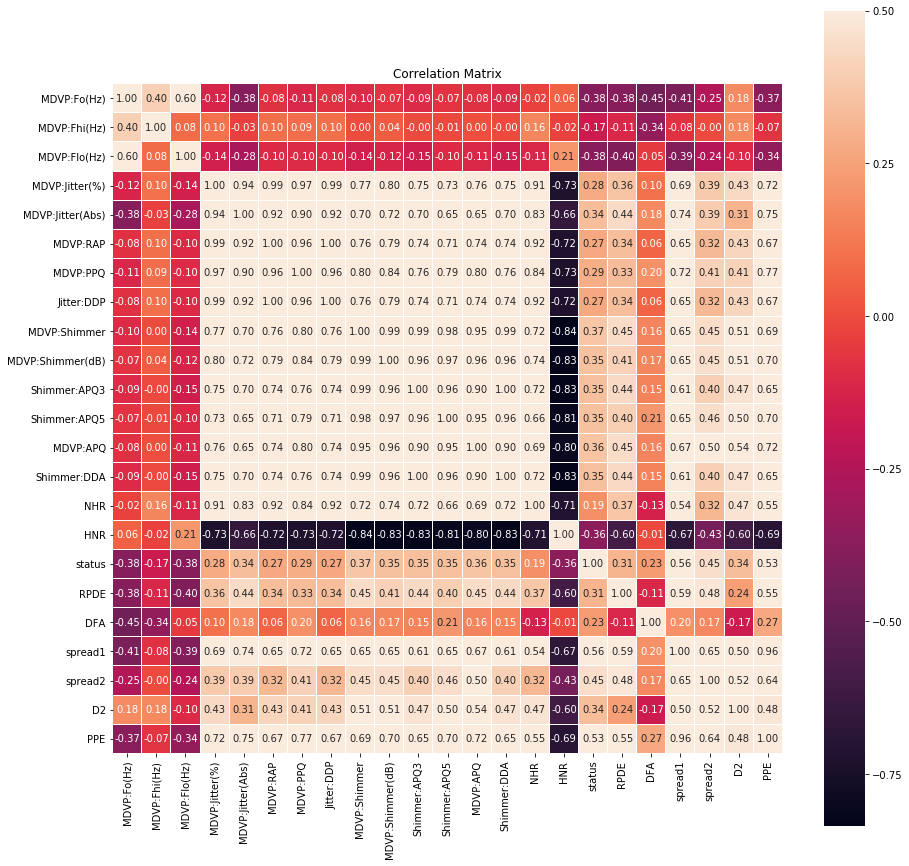

In [10]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df.corr(), vmax=.5, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation Matrix')
plt.show()

Inference: 

Dependent Variables : 
MDVP Fo(Hz), MDVP Fhi(Hz), MDVP Flo (Hz) have negative correlation with the dependent variable. 
Other variables donot show much correlation either with the Target variable - Status.

Independent Variables : MDVP Fo(Hz), MDVP Fhi(Hz), MDVP Flo (Hz), MDVP Jitter (%), MDVP Flo (Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP Shimmer (dB), Shimmer APQ3, Shimmer: APQ5, MDVP: APQ, Shimmer DDA, NHR all have high correlation amongst them.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

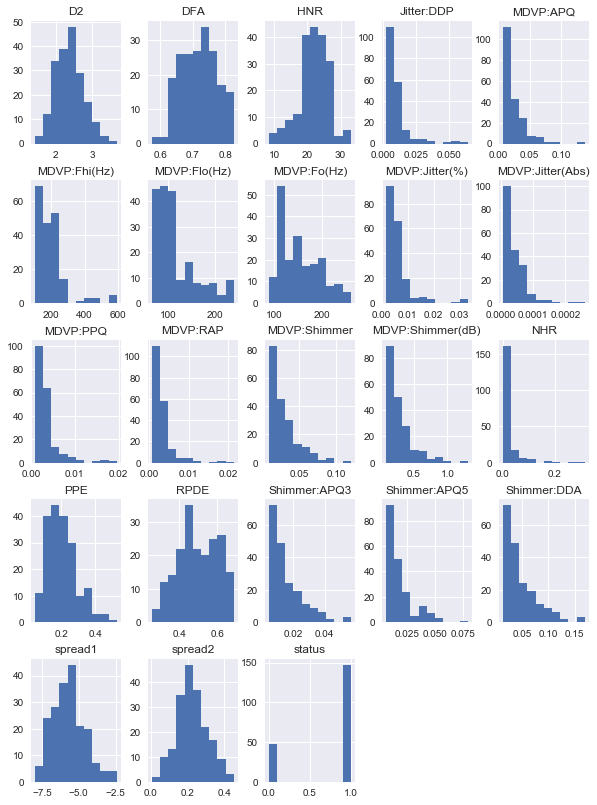

In [12]:
hist = df.hist(figsize=(10, 14))

# As we can see - data is skewed, hence we would need to do preprocessing of data. 
In our case we will use Scalar - Min Max
The motivation to use this scaling includes robustness to very small standard deviations of features and preserving zero entries in sparse data.

In [13]:
df1 = df.copy()
df1.drop(['name'],axis=1)
df1.shape

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

df2 = df.copy()
yss = df2.status
df2 = df2.drop(['name','status'], axis=1)
Xss = df2.values
scaler = MinMaxScaler(feature_range=(-1,1))
scaled = scaler.fit_transform(Xss)

features = df.loc[:, df.columns != 'status'].values[:, 1:]
labels = df.loc[:, 'status'].values


(195, 24)

# Bivariate Analysis

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: spread1, dtype: object

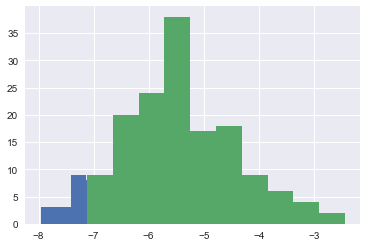

In [17]:
df.groupby('status').spread1.hist()

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: spread2, dtype: object

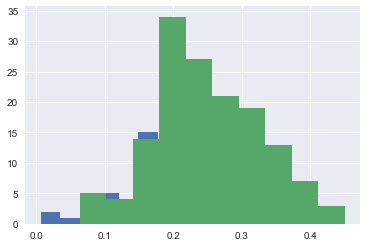

In [18]:
df.groupby('status').spread2.hist()

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: PPE, dtype: object

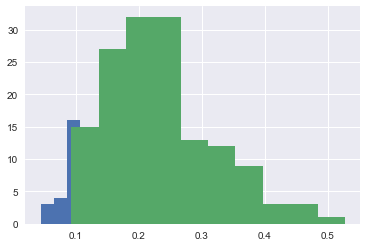

In [19]:
df.groupby('status').PPE.hist()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


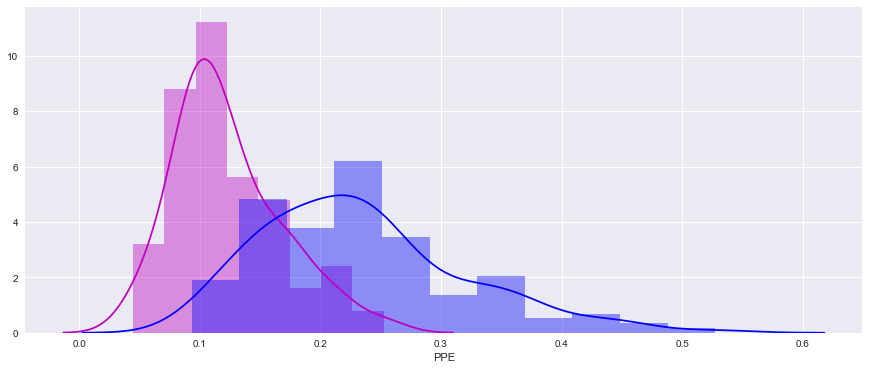

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 6))
sns.distplot( df[df['status'] == 0]['PPE'], color = 'm')
sns.distplot( df[df['status'] == 1]['PPE'], color = 'b')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


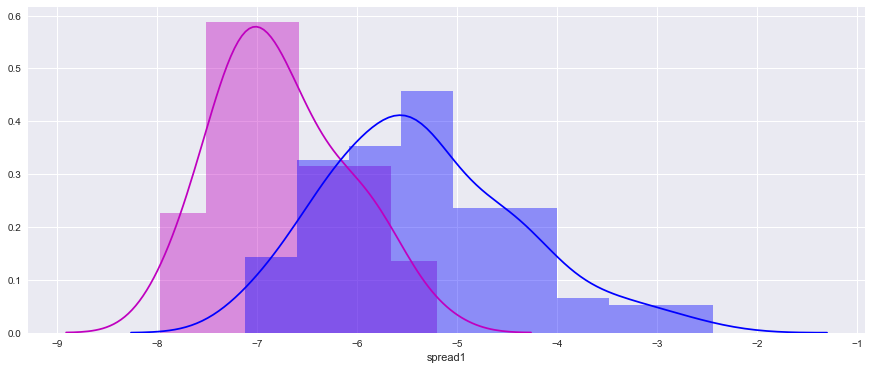

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 6))
sns.distplot( df[df['status'] == 0]['spread1'], color = 'm')
sns.distplot( df[df['status'] == 1]['spread1'], color = 'b')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


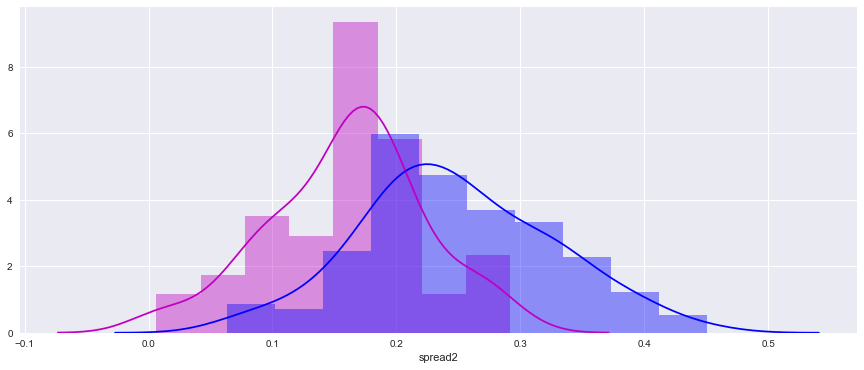

In [22]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 6))
sns.distplot( df[df['status'] == 0]['spread2'], color = 'm')
sns.distplot( df[df['status'] == 1]['spread2'], color = 'b')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


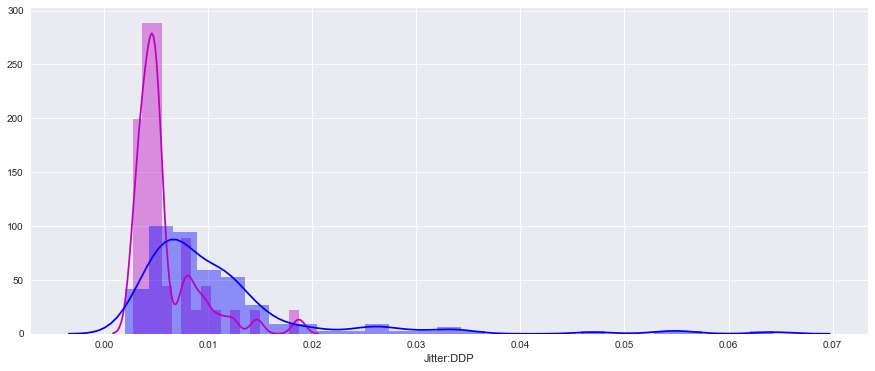

In [23]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 6))
sns.distplot( df[df['status'] == 0]['Jitter:DDP'], color = 'm')
sns.distplot( df[df['status'] == 1]['Jitter:DDP'], color = 'b')

Inference: Data is not a Gaussian distribution and is highly skewed.

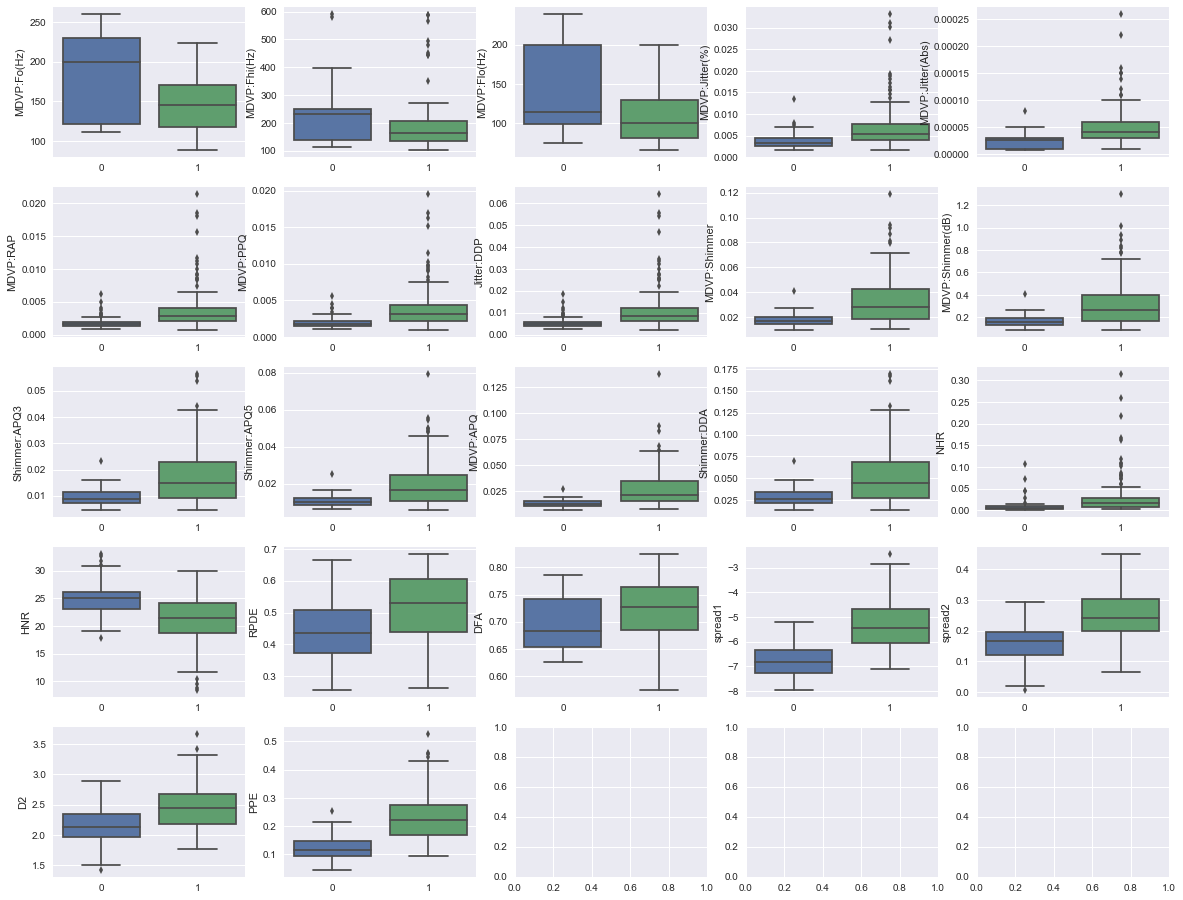

In [24]:
fig, axes = plt.subplots(nrows = 5, ncols = 5,figsize=(20,16))
for i,feat in enumerate(df1.columns):
    ax = axes[int(i/5),i%5]
    sns.boxplot(x='status',y=feat,data=df,ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)

### Outlier Treatment

In [ ]:
#try to handle the outliers with the median values for status = 1 
df2['PPE'] = np.where(df2['PPE'] >0.44, df2['PPE'].median(),df['PPE'])
df2['HNR'] = np.where(df2['HNR'] <12, df2['HNR'].median(),df['HNR'])
df2['NHR'] = np.where(df2['NHR'] >0.051, df2['NHR'].median(),df['NHR'])
df2['MDVP:APQ'] = np.where(df2['MDVP:APQ'] >0.063, df2['MDVP:APQ'].median(),df['MDVP:APQ'])
df2['MDVP:Shimmer'] = np.where(df2['MDVP:Shimmer'] >0.078, df2['MDVP:Shimmer'].median(),df['MDVP:Shimmer'])
df2['MDVP:PPQ'] = np.where(df2['MDVP:PPQ'] >0.0075, df2['MDVP:PPQ'].median(),df['MDVP:PPQ'])
df2['MDVP:Jitter(Abs)'] = np.where(df2['MDVP:Jitter(Abs)'] >0.00010, df2['MDVP:Jitter(Abs)'].median(),df['MDVP:Jitter(Abs)'])
df2['MDVP:Fhi(Hz)'] = np.where(df2['MDVP:Fhi(Hz)'] >300, df2['MDVP:Fhi(Hz)'].median(),df['MDVP:Fhi(Hz)'])

# 2. Split the data into training and test set in the ratio of 70:30 respectively

In [ ]:
Xss_train, Xss_test, yss_train, yss_test = cross_validation.train_test_split(Xss, yss, train_size=0.7, test_size=0.3, random_state=42)

# 3. Classification algorithms and compare the models to find the best model

# Create a DT

In [ ]:
import time
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [100,200,300],
    'max_features': ['auto', 'sqrt', 'log2']
}

    
dict_classifiers = {
    
    ### BAGGING 
    "CART - Decision Tree:": DecisionTreeClassifier(criterion = 'entropy', max_depth = 10,random_state=42),
    "Random Forest": RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=25, oob_score = False, random_state=42),
    "GridSearchCV": GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring='precision'),
    "Bagging+KNN N=3": BaggingClassifier(KNeighborsClassifier(n_neighbors =3),max_samples=0.5, max_features=0.5,random_state=42),
    "Bagging+KNN N=7": BaggingClassifier(KNeighborsClassifier(n_neighbors =7),max_samples=0.5, max_features=0.5,random_state=42),
    "Bagging+SVM RBF": BaggingClassifier(SVC(kernel='rbf',C=1)),
    "Bagging+SVM Linear": BaggingClassifier(SVC(kernel='linear',C=1)),
    "Bagging+Logistic": BaggingClassifier(LogisticRegression()),
    
    ### BOOSTING
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "Ada Boost Classifier": AdaBoostClassifier(n_estimators=10),
    "Extra Tree Classifier": ExtraTreesClassifier(n_estimators=10, max_depth=50,min_samples_split=2, random_state=42)
    
    ##-----Not sure of using these, as mentioned in the assignment - Use Ensemble Techniques-----##   
    #     "Logistic Regression": LogisticRegression(),
    #     "LDA": LinearDiscriminantAnalysis(),
    #     "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors =3),
    #     "SVM - Linear": SVC(kernel = 'linear', C = 0.1),
    #     "SVM - RBF": SVC(kernel='rbf',C=1),
    #     "NB Gaussian": GaussianNB()
    
    }

In [ ]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(Xss_train, yss_train, yss_test, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,4)), 
                 columns = ['classifier', 'train_score', 'accuracy_score','training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        clf = classifier.fit(Xss_train, yss_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        
        predictions = classifier.predict(Xss_test)
        accuracy = accuracy_score(yss_test, predictions)*100
        train_score = classifier.score(Xss_train, yss_train)
        
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'accuracy_score'] = accuracy
        df_results.loc[count,'training_time'] = t_diff
        count+=1
        
    return df_results

In [ ]:
print ("\nModel Scores on Scalar Min Max Preprocessed Data\n\n")
df_results = batch_classify(Xss_train, yss_train, yss_test)
print(df_results.sort_values(by='accuracy_score', ascending=False))

# Conclusion

**Grid Search CV with the Random Forest Estimator gives a 100% Training Score and 94.91% accuracy. - However the cost (time to execute / computation intensive) of this classifier is high.
If high accuracy is desired - this model should be considered.**

**Else keeping in mind the cost (time to execute) - Our Random Forest with the given hyper-parameters gives a 100% Training Score with a 93.22% accuracy.**

----------------------------------------------------------------------------------------------------------------

# Explicitly Performing Grid Search CV and getting relevant details for the model 

----------------------------------------------------------------------------------------------------------------

# Ensemble Voting Classifier

### Taking the top 3 Accuracy Score Models for Ensemble Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
clf1 = RandomForestClassifier()
clf2 = GridSearchCV(estimator=rfc, param_grid=param_grid)
clf3 = GradientBoostingClassifier()

#### Using Cross Validation Scores, ensures minimizing bias and variance

#### Hard Voting with Scoring Method Precision

In [ ]:
eclf = VotingClassifier(estimators=[('rf', clf1), ('gscv', clf2), ('gb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Random Forest', 'Grid Search CV', 'Gradient Boosting', 'Ensemble']):
    scores = cross_val_score(clf, Xss, yss, cv=5, scoring='precision')
    print("Cross Validation Scores: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

#### Soft Voting with Weights

In [ ]:
eclf = VotingClassifier(estimators=[('rf', clf1), ('gscv', clf2), ('gb', clf3)], voting='soft', weights=[2,5,1])

for clf, label in zip([clf1, clf2, clf3, eclf], ['Random Forest', 'Grid Search CV', 'Gradient Boosting', 'Ensemble']):
    scores = cross_val_score(clf, Xss, yss, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))